# Uncharged particles

### Task 1
**A.** Calculate the total KN cross section for 1 MeV photons and the Compton mass attenuation coefficient for copper expressed in cm$^2$/g.

The Klein-Nishina cross section can be calculated as

$_{e}\sigma_{C,KN} = 2\pi r_e^2 \left\{ \frac{1 + \epsilon}{\epsilon^2} \left[ \frac{2(1 + \epsilon}{1 + 2\epsilon} - \frac{\ln(1 + 2\epsilon)}{\epsilon} \right] + \frac{\ln(1 + 2\epsilon)}{2\epsilon} - \frac{1 + 3\epsilon}{(1 + 2\epsilon)^2} \right\}$

where $\epsilon = E / m_e c^2$.

The Compton mass attenuation coefficient for copper can be calculated as

$\frac{\sigma_{C,KN}}{\rho} = \frac{Z N_A}{A} _{e}\sigma_{C,KN}$.

**B.** Compare the calculated value of the Compton mass attenuation coefficient to the value in the [XCOM](https://physics.nist.gov/PhysRefData/Xcom/html/xcom1.html) database.

In [1]:
import math

def sigma_KN(E):
    # Total Klein-Nishina cross section
    #
    # E   energy of the photon in MeV
    
    re = 2.818e-13  # classical electron radius in cm
    mec2 = 0.511    # rest energy of electron in MeV
    eps = E / mec2
    return(2 * math.pi * re**2 * ((1 + eps) / eps**2 * (2 * (1 + eps) / (1 + 2 * eps) - math.log(1 + 2 * eps) / eps) + math.log(1 + 2 * eps) / (2 * eps) - (1 + 3 * eps) / (1 + 2 * eps)**2))


def mu_m_KN(E, Z, A):
    # Compton mass attenuation coefficient according to Klein-Nishina
    #
    # E  # energy of the photon in MeV
    # Z  # atomic number of the material
    # A  # mass number of the material
    
    N_A = 6.022e23  # Avogadro number
    return(Z * N_A / A * sigma_KN(E))


# Incident particle
E = 1.0   # energy of the photon in MeV

# Material
Z = 29
A = 63.546

# Calculate the Klein-Nishina cross section
sigma_KN_v =  sigma_KN(E)

# Calculate the Compton mass attenuation coefficient for copper according to Klein-Nishina
mu_m_KN_Cu = mu_m_KN(E, Z, A)

# Print the results
print('Klein-Nishina cross section = {:g} cm^2'.format(sigma_KN_v))
print('Compton mass attenuation coefficient = {:g} cm^2 g^-1'.format(mu_m_KN_Cu))

Klein-Nishina cross section = 2.11217e-25 cm^2
Compton mass attenuation coefficient = 0.058047 cm^2 g^-1


### Task 2
Show that the Klein-Nishina cross section approaches the Thomson cross section at low photon energies. The differential Thomson cross section can be calculated as

$\frac{d _{e}\sigma_{\mathrm{Th}}}{d \Omega} = r_e^2 \frac{1 + \cos^2 \theta}{2}$.

The total Thomson cross section is $_{e}\sigma_{\mathrm{Th}} = \frac{8}{3} \pi r_e^2$.

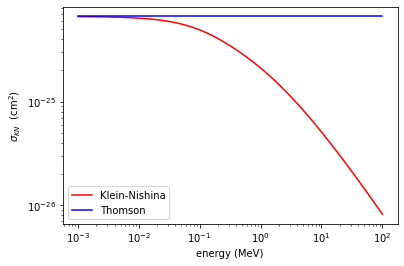

In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt


def sigma_KN(E):
    # Total Klein-Nishina cross section
    #
    # E   energy of the photon in MeV
    
    re = 2.818e-13  # classical electron radius in cm
    mec2 = 0.511    # rest energy of electron in MeV
    eps = E / mec2
    return(2 * math.pi * re**2 * ((1 + eps) / eps**2 * (2 * (1 + eps) / (1 + 2 * eps) - math.log(1 + 2 * eps) / eps) + math.log(1 + 2 * eps) / (2 * eps) - (1 + 3 * eps) / (1 + 2 * eps)**2))

# Total Thomson cross section
re = 2.818e-13  # classical electron radius in cm
sigma_Th = 8/3 * math.pi * re**2


# Compute plot points
nPoints = 128
energy_a = np.logspace(-3, 2, nPoints)
sigma_KN_a = np.empty(nPoints)
sigma_Th_a = np.empty(nPoints)
for i in range(nPoints):
    sigma_KN_a[i] = sigma_KN(energy_a[i])
    sigma_Th_a[i] = sigma_Th
     
# Plot the figure
plt.plot(energy_a, sigma_KN_a, 'r', label = 'Klein-Nishina')
plt.plot(energy_a, sigma_Th_a, 'b', label = 'Thomson')
plt.semilogx()
plt.semilogy()
plt.xlabel(r'energy (MeV)')
plt.ylabel(r'$\sigma_{KN}$  (cm$^2$)')
plt.legend(loc = 'lower left',)
plt.show()

### Task 3
The Alvarez-Macovski method in dual-energy computed tomography uses two material bases to represent the attenuation of the imaged material. Common bases are, for instance, water and bone. Nevertheless, it is also possible to decompose the imaged material to **photoelectric effect** and **Compton scattering** bases whose energy dependencies are approximated as $\sim 1/E^3$ and via the Klein-Nishina (KN) cross section, respectively. Discuss the validity of this approximation. Notes:
*   The Alwarez-Macovski method neglects coherent scattering and therefore the fractions for photoelectric effect and Compton scattering are inacurate.
*   The KN cross section does not represent the incoherent scattering well at low photon energies. The KN cross section increases with decreasing photon energy. Experimental data show that the incoherent scattering decreases with decreasing energy.
*   Incoherent scattering decreases at low energies because the electrons are not free, they are bound. This decrease is predicted by the impulse approximation model.
*   The addition of coherent scattering cross sections to the incoherent scattering cross section at low photon energies compensates for the increase of the latter. Thus, instead of Compton scattering fraction, the Alwarez-Macovski method predicts incoherent + coherent scattering fraction. How good this approximation is?

The code below uses NIST XCAT data for carbon. Check the arguments above by looking at the figure.

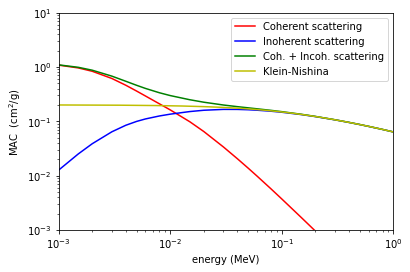

In [3]:
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

def sigma_KN(E):
    # Total Klein-Nishina cross section
    #
    # E   energy of the photon in MeV
    
    re = 2.818e-13  # classical electron radius in cm
    mec2 = 0.511    # rest energy of electron in MeV
    eps = E / mec2
    return(2 * math.pi * re**2 * ((1 + eps) / eps**2 * (2 * (1 + eps) / (1 + 2 * eps) - math.log(1 + 2 * eps) / eps) + math.log(1 + 2 * eps) / (2 * eps) - (1 + 3 * eps) / (1 + 2 * eps)**2))

def mu_m_KN(E, Z, A):
    # Compton mass attenuation coefficient according to Klein-Nishina
    #
    # E  # energy of the photon in MeV
    # Z  # atomic number of the material
    # A  # mass number of the material
    
    N_A = 6.022e23  # Avogadro number
    return(Z * N_A / A * sigma_KN(E))


# Material
Z = 6
A = 12

# Read cross section data from a file
url = 'https://raw.githubusercontent.com/AlexandrMalusek/MSF_course/main/xcom_carbon.csv'
df = pd.read_csv(url)
#df = pd.read_csv('xcom_carbon.csv')


# Compute plot points
nPoints = 128
energy_a = np.logspace(-3, 2, nPoints)
mu_m_KN_a = np.empty(nPoints)
for i in range(nPoints):
    mu_m_KN_a[i] = mu_m_KN(energy_a[i], Z, A)
     
# Plot the figure
plt.plot(df['energy'], df['mac_co'], 'r', label = 'Coherent scattering')
plt.plot(df['energy'], df['mac_in'], 'b', label = 'Inoherent scattering')
plt.plot(df['energy'], df['mac_co'] + df['mac_in'], 'g', label = 'Coh. + Incoh. scattering')
plt.plot(energy_a, mu_m_KN_a, 'y', label = 'Klein-Nishina')
plt.xlim([1e-3, 1])
plt.ylim(1e-3, 10)
plt.semilogx()
plt.semilogy()
plt.xlabel(r'energy (MeV)')
plt.ylabel(r'MAC  (cm$^2$/g)')
plt.legend(loc = 'upper right',)
plt.show()